In [91]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
df_sredondeo =pd.read_csv("earthquake_1995-2023.csv")
df = df_sredondeo.round(1)
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.

df['terremoto'] = np.where(df['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
df['intensidad'] = np.where(df['magnitude'] <= 3.5, 'leve',
                           np.where(df['magnitude'] <= 6.9, 'moderado', 'fuerte'))


In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(15)



,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,terremoto,intensidad
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.2,25.0,mww,193.0,-13.9,167.2,"Sola, Vanuatu",NaN,Vanuatu,1,moderado
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.7,40.0,mww,69.7,12.8,-88.1,"Intipucá, El Salvador",NaN,NaN,1,moderado
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.6,28.0,mww,171.4,-38.2,-70.4,"Loncopué, Argentina",South America,Argentina,1,moderado
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.9,36.0,mww,32.6,54.4,-160.7,"Sand Point, Alaska",NaN,NaN,1,fuerte
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.9,172.8,Mi,21.0,54.5,-160.8,Alaska Peninsula,NaN,NaN,1,fuerte
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10-07-2023 20:28,5,4,green,1,802,us,95,2.5,37.0,mww,10.0,20.0,-61.1,"Codrington, Antigua and Barbuda",NaN,NaN,1,moderado
6,M 6.9 - Tonga,6.9,02-07-2023 10:27,4,4,green,1,741,us,136,1.2,23.0,mww,229.0,-17.9,-174.9,Tonga,NaN,NaN,1,moderado
7,M 7.2 - south of the Fiji Islands,7.2,15-06-2023 18:06,8,6,green,1,804,us,85,2.6,24.0,mww,167.4,-23.0,-177.2,the Fiji Islands,NaN,NaN,1,fuerte
8,M 6.6 - Panama-Colombia border region,6.6,25-05-2023 03:05,6,6,green,1,733,us,50,2.2,129.0,mww,10.0,8.9,-77.1,Panama-Colombia border region,NaN,Colombia,1,moderado
9,M 7.1 - southeast of the Loyalty Islands,7.1,20-05-2023 01:51,3,4,green,1,777,us,98,2.8,56.0,mww,36.0,-23.1,170.5,the Loyalty Islands,NaN,NaN,1,fuerte


In [93]:
# title: título nombre dado al terremoto
# magnitude: La magnitud del terremoto
# date_time: fecha y hora
# cdi: la intensidad máxima reportada para el rango del evento
# mmi: La intensidad instrumental máxima estimada para el evento.
# alert: el nivel de alerta: “verde”, “amarillo”, “naranja” y “rojo”
# tsunami: "1" para eventos en regiones oceánicas y "0" en caso contrario
# sig: un número que describe la importancia del evento. Los números más grandes indican un evento más significativo. Este valor se determina en
#  función de una serie de factores, que incluyen: magnitud, MMI máximo, informes sentidos e impacto estimado.
# net: el ID de un contribuyente de datos. Identifica la red considerada como la fuente de información preferida para este evento.
# nst: El número total de estaciones sismológicas utilizadas para determinar la ubicación del terremoto.
# dmin: Distancia horizontal desde el epicentro hasta la estación más cercana
# gap: la brecha azimutal más grande entre estaciones azimutalmente adyacentes (en grados). En general, cuanto menor sea este número, 
# más fiable será la posición horizontal calculada del terremoto. Los lugares donde se producen terremotos en los que la brecha azimutal 
# supera los 180 grados suelen tener grandes incertidumbres de ubicación y profundidad.
# magType: el método o algoritmo utilizado para calcular la magnitud preferida para el evento
# depth: La profundidad donde el terremoto comienza a romperse
# latitude/longitude: sistema de coordenadas mediante el cual se puede determinar y describir la posición o ubicación de cualquier lugar de 
# la superficie terrestre
# location: ubicación dentro del país
# continent: continente del país afectado por el terremoto
# country: país afectado
#terremoto: indica 1 si es terremoto y 0 si no lo es segun la escala de richter
#intensidad: se determina 3 tipos de intensidad leve moderada y fuerte

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       1000 non-null   object 
 1   magnitude   1000 non-null   float64
 2   date_time   1000 non-null   object 
 3   cdi         1000 non-null   int64  
 4   mmi         1000 non-null   int64  
 5   alert       449 non-null    object 
 6   tsunami     1000 non-null   int64  
 7   sig         1000 non-null   int64  
 8   net         1000 non-null   object 
 9   nst         1000 non-null   int64  
 10  dmin        1000 non-null   float64
 11  gap         1000 non-null   float64
 12  magType     1000 non-null   object 
 13  depth       1000 non-null   float64
 14  latitude    1000 non-null   float64
 15  longitude   1000 non-null   float64
 16  location    994 non-null    object 
 17  continent   284 non-null    object 
 18  country     651 non-null    object 
 19  terremoto   1000 non-null   

intensidad
moderado    627
fuerte      373
Name: count, dtype: int64


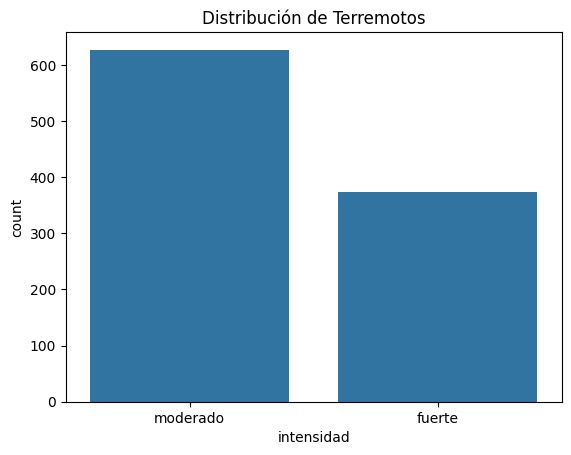

In [95]:
# Contar los valores únicos
print(df['intensidad'].value_counts())

# Visualizar la distribución
sns.countplot(x='intensidad', data=df)
plt.title('Distribución de Terremotos')
plt.show()

In [96]:
df.shape

(1000, 21)

*Magnitud minima del dataframe 6.5 y maxima 9.1, cabe destacar que en el proyecto no podemos visualizar la clase __leve__ ya que nuestro dataset <br> no contiene  aun valores menores a 3.5 de magnitud, mas adelante realizaremos el proceso para anexar valores en ese rango y comprobar resultados*

In [97]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,6.940200,3.605000,6.02700,0.325000,847.915000,193.918000,1.125000,20.926300,74.612900,4.316000,51.486500,1.0
std,0.438288,3.328972,1.43399,0.468609,301.802632,239.045858,2.074024,24.415909,130.813687,26.632258,117.478767,0.0
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.800000,-180.000000,1.0
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.525000,-71.700000,1.0
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.450000,107.800000,1.0
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.525000,27.000000,55.000000,25.150000,148.350000,1.0
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.700000,239.000000,670.800000,71.600000,179.700000,1.0


*Comprobamos el porcentaje de valores nulos en cada celda del dataframe*

In [98]:
df.isnull().sum()/df.shape[0]*100

title          0.0
magnitude      0.0
date_time      0.0
cdi            0.0
mmi            0.0
alert         55.1
tsunami        0.0
sig            0.0
net            0.0
nst            0.0
dmin           0.0
gap            0.0
magType        0.0
depth          0.0
latitude       0.0
longitude      0.0
location       0.6
continent     71.6
country       34.9
terremoto      0.0
intensidad     0.0
dtype: float64

In [99]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'terremoto',
       'intensidad'],
      dtype='object')

Limpia columnas irrelevantes para la clasificación

In [100]:

df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto,intensidad
0,6.5,16-08-2023 12:47,7,4,0,657,us,114,7.2,25.0,mww,193.0,-13.9,167.2,Vanuatu,1,moderado
1,6.5,19-07-2023 00:22,8,6,0,775,us,92,0.7,40.0,mww,69.7,12.8,-88.1,NaN,1,moderado
2,6.6,17-07-2023 03:05,7,5,0,899,us,70,1.6,28.0,mww,171.4,-38.2,-70.4,Argentina,1,moderado
3,7.2,16-07-2023 06:48,6,6,1,860,us,173,0.9,36.0,mww,32.6,54.4,-160.7,NaN,1,fuerte
4,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.9,172.8,Mi,21.0,54.5,-160.8,NaN,1,fuerte


In [101]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_57900\3140321069.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [102]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,terremoto,intensidad,Year,Month
0,6.5,7,4,0,657,us,114,7.2,25.0,mww,193.0,-13.9,167.2,Vanuatu,1,moderado,2023,8
1,6.5,8,6,0,775,us,92,0.7,40.0,mww,69.7,12.8,-88.1,NaN,1,moderado,2023,7
2,6.6,7,5,0,899,us,70,1.6,28.0,mww,171.4,-38.2,-70.4,Argentina,1,moderado,2023,7
3,7.2,6,6,1,860,us,173,0.9,36.0,mww,32.6,54.4,-160.7,NaN,1,fuerte,2023,7
4,7.3,0,5,1,820,at,79,0.9,172.8,Mi,21.0,54.5,-160.8,NaN,1,fuerte,2023,7


In [103]:
df.isnull().sum()

magnitude       0
cdi             0
mmi             0
tsunami         0
sig             0
net             0
nst             0
dmin            0
gap             0
magType         0
depth           0
latitude        0
longitude       0
country       349
terremoto       0
intensidad      0
Year            0
Month           0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   magnitude   1000 non-null   float64
 1   cdi         1000 non-null   int64  
 2   mmi         1000 non-null   int64  
 3   tsunami     1000 non-null   int64  
 4   sig         1000 non-null   int64  
 5   net         1000 non-null   object 
 6   nst         1000 non-null   int64  
 7   dmin        1000 non-null   float64
 8   gap         1000 non-null   float64
 9   magType     1000 non-null   object 
 10  depth       1000 non-null   float64
 11  latitude    1000 non-null   float64
 12  longitude   1000 non-null   float64
 13  country     651 non-null    object 
 14  terremoto   1000 non-null   int64  
 15  intensidad  1000 non-null   object 
 16  Year        1000 non-null   int32  
 17  Month       1000 non-null   int32  
dtypes: float64(6), int32(2), int64(6), object(4)
memory usage: 132.9+ KB


EDA

<Axes: xlabel='magnitude', ylabel='count'>

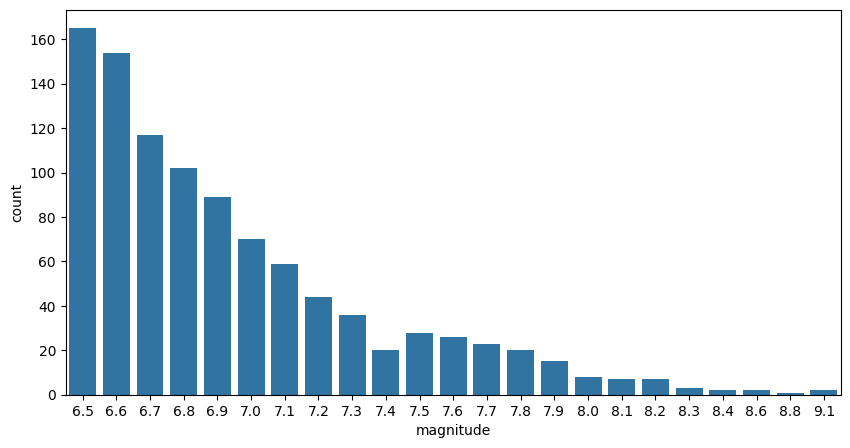

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale


Text(0.5, 1.0, 'TOP 15 terremotos x pais')

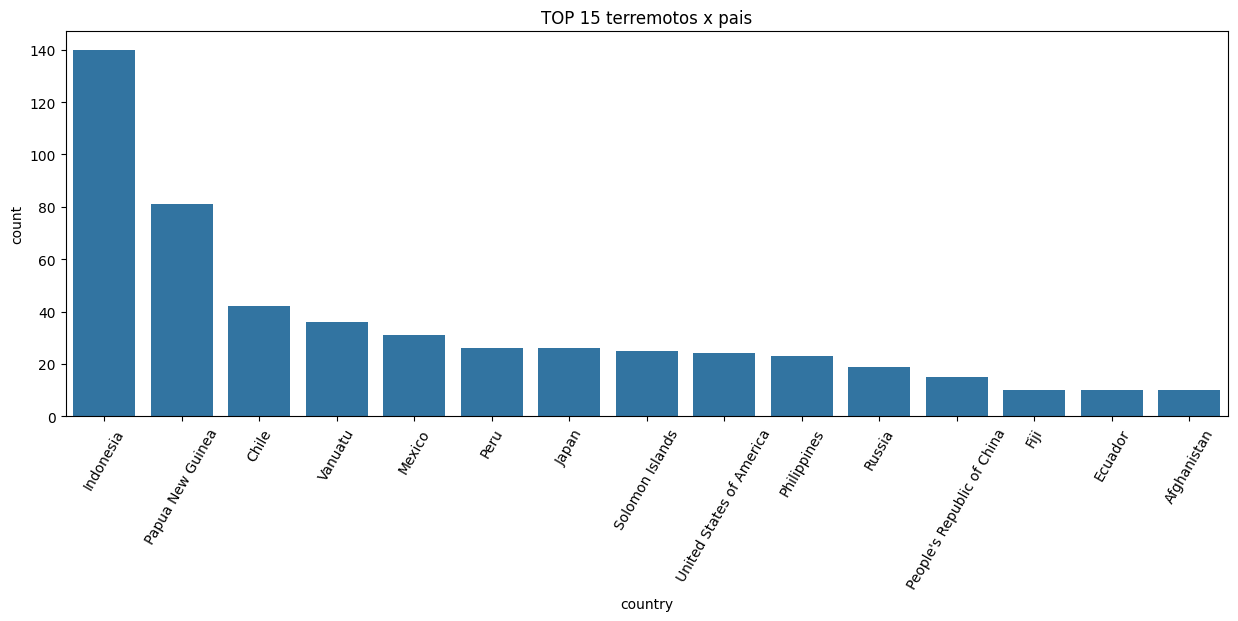

In [106]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 terremotos x pais')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')

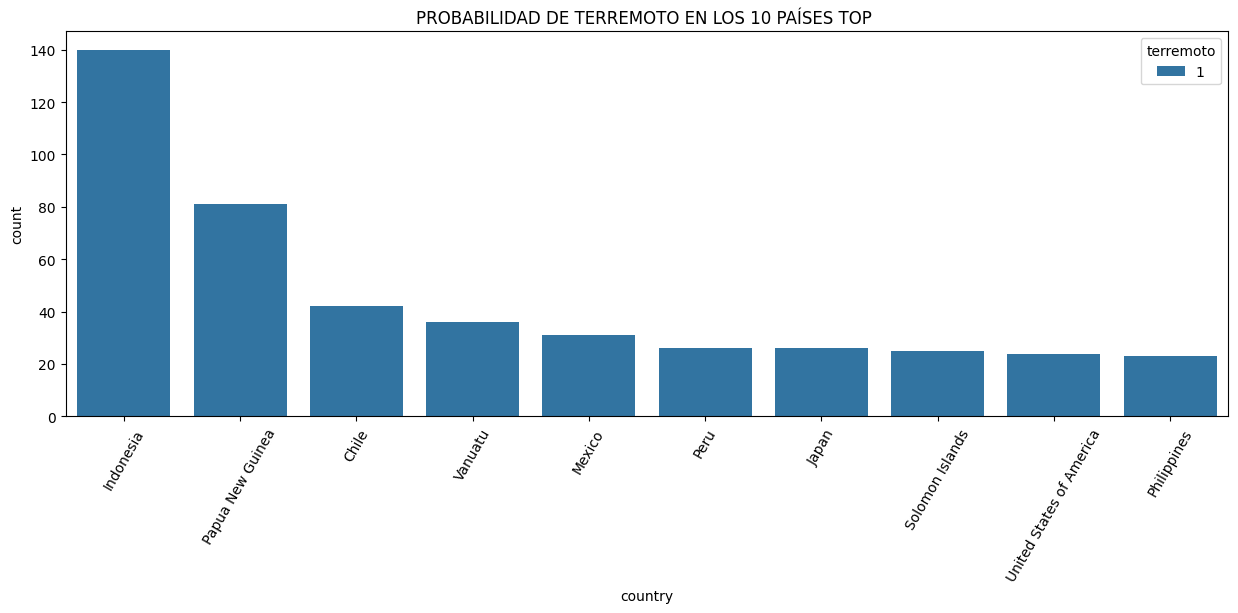

In [107]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='terremoto')
plt.xticks(rotation=60)
plt.title('PROBABILIDAD DE TERREMOTO EN LOS 10 PAÍSES TOP ')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.


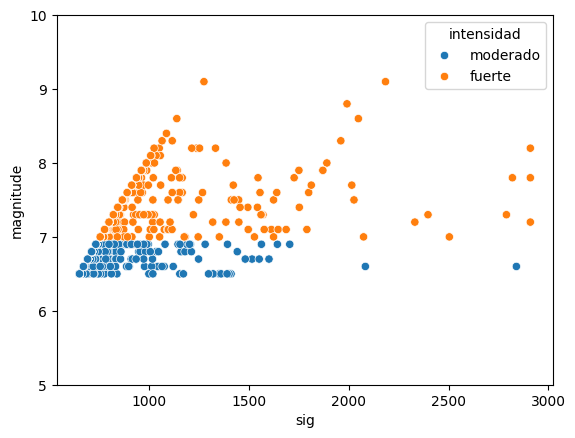

In [108]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='intensidad')
plt.ylim(5, 10)  # Ajusta los límites según tus necesidades
plt.show()
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'Distribucion de terremotos')

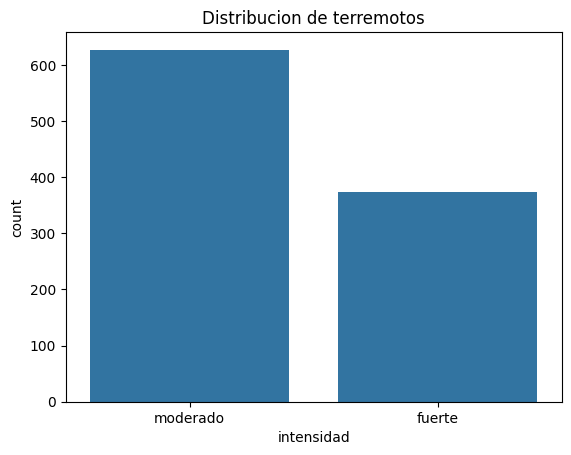

In [109]:
sns.countplot(x='intensidad',data=df)
plt.title('Distribucion de terremotos')

<Axes: xlabel='Year', ylabel='count'>

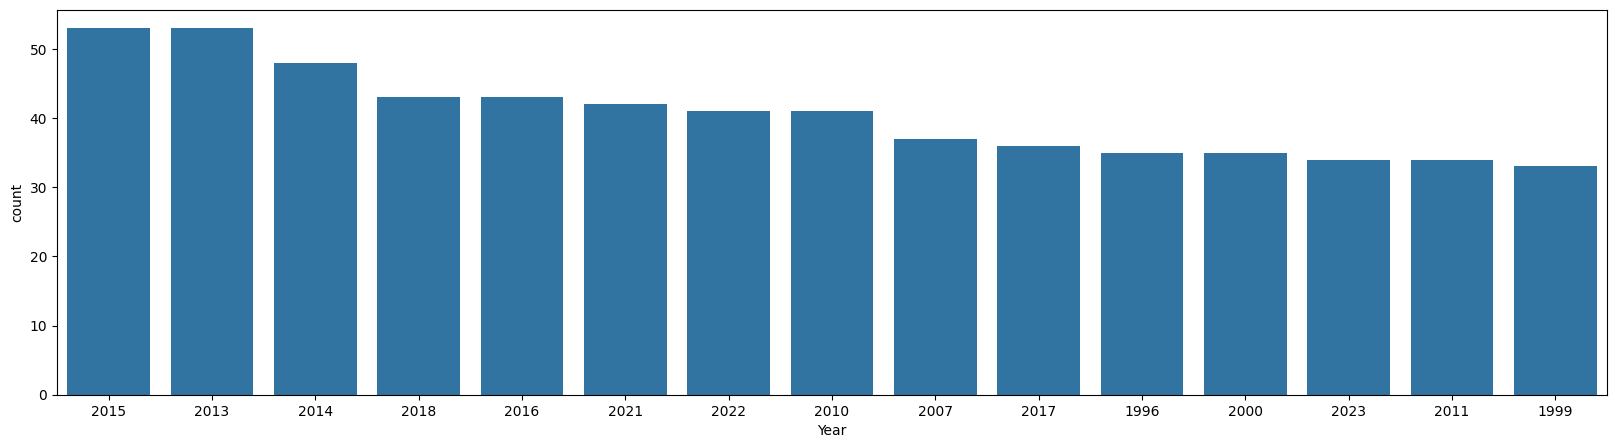

In [110]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')

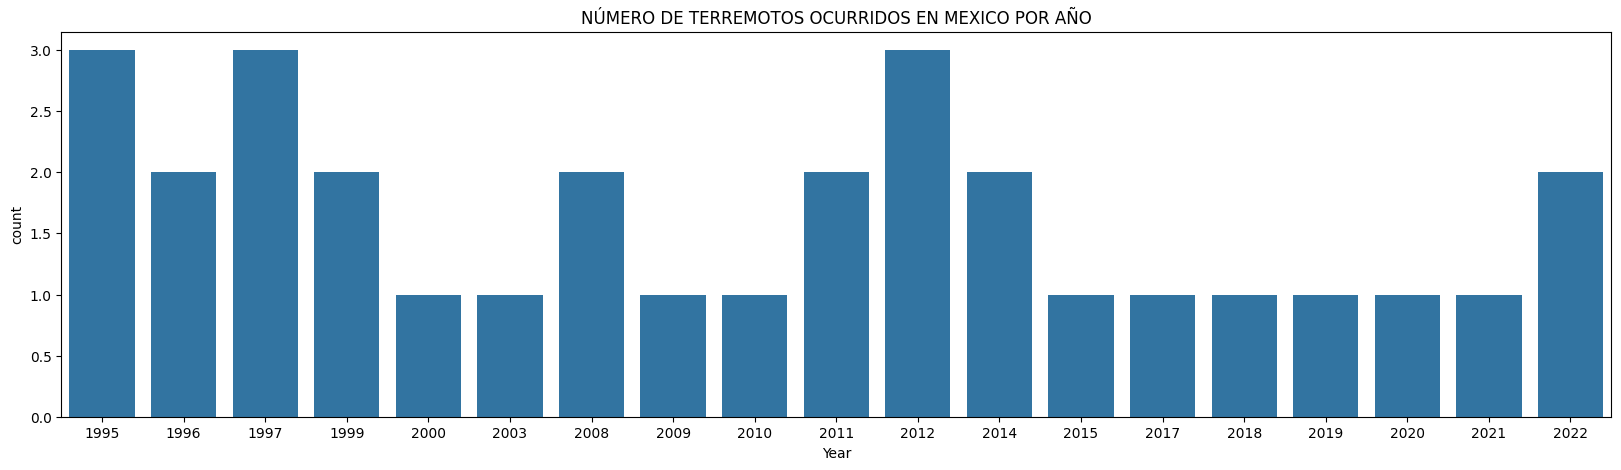

In [111]:
Indo=df[df['country']=='Mexico']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')
#Indonesia encountered 13 earthquic in the year 2007

In [112]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [113]:
obj=df.select_dtypes(include=['object'])
obj.head()
#we can drop net because 95% of data contributed by US 

,net,magType,intensidad
0,us,mww,moderado
1,us,mww,moderado
2,us,mww,moderado
3,us,mww,fuerte
4,at,Mi,fuerte


In [114]:
obj.nunique()

net           11
magType        9
intensidad     2
dtype: int64

In [115]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType','intensidad'],axis=1,inplace=True)

lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType,intensidad
0,6.5,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,2023,8,8,1
1,6.5,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,2023,7,8,1
2,6.6,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,2023,7,8,1
3,7.2,6,6,1,860,173,0.9,36.0,32.6,54.4,-160.7,1,2023,7,8,0
4,7.3,0,5,1,820,79,0.9,172.8,21.0,54.5,-160.8,1,2023,7,0,0


<Axes: >

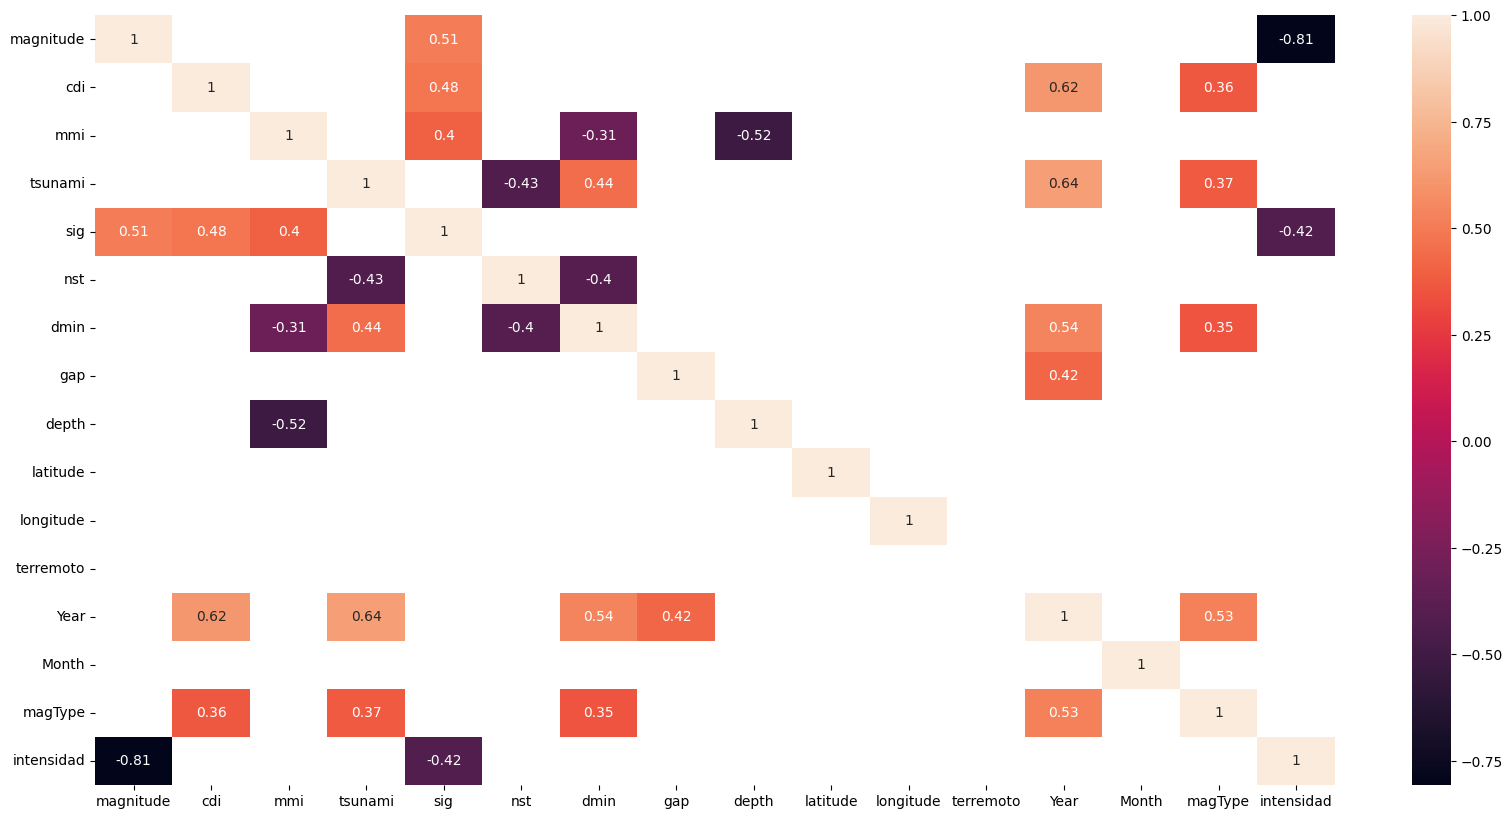

In [116]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   magnitude   1000 non-null   float64
 1   cdi         1000 non-null   int64  
 2   mmi         1000 non-null   int64  
 3   tsunami     1000 non-null   int64  
 4   sig         1000 non-null   int64  
 5   nst         1000 non-null   int64  
 6   dmin        1000 non-null   float64
 7   gap         1000 non-null   float64
 8   depth       1000 non-null   float64
 9   latitude    1000 non-null   float64
 10  longitude   1000 non-null   float64
 11  terremoto   1000 non-null   int64  
 12  Year        1000 non-null   int32  
 13  Month       1000 non-null   int32  
 14  magType     1000 non-null   int64  
 15  intensidad  1000 non-null   int64  
dtypes: float64(6), int32(2), int64(8)
memory usage: 117.3 KB


In [118]:
print(df.columns)

Index(['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
       'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
       'magType', 'intensidad'],
      dtype='object')


In [119]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin',  'Year', 'Month', 'magType']]
y = df['intensidad']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 


In [120]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       105
           1       0.83      0.87      0.85       195

    accuracy                           0.80       300
   macro avg       0.78      0.76      0.77       300
weighted avg       0.79      0.80      0.79       300



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
confusion_matrix(y_test, y_pred)

array([[ 69,  36],
       [ 25, 170]])

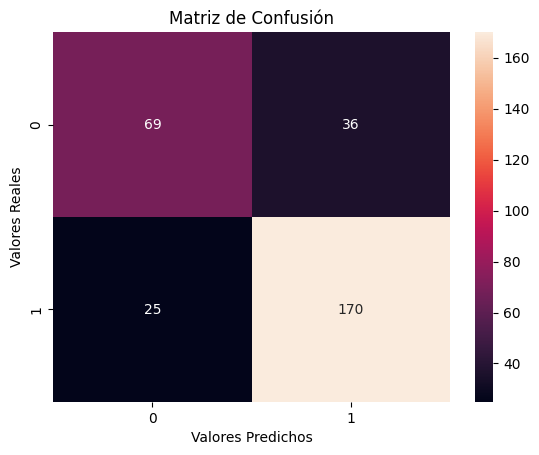

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión (suponiendo que ya tienes y_test e y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

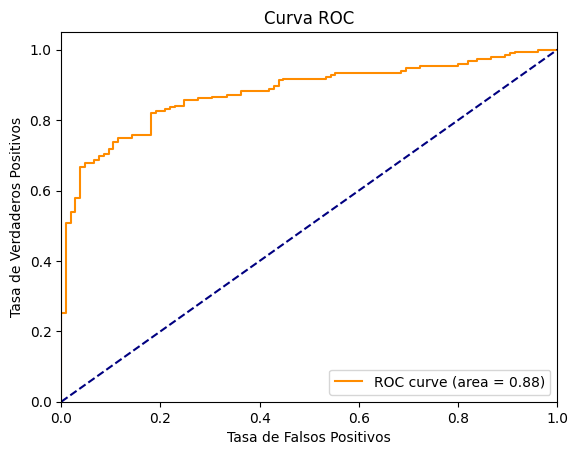

Text(0.5, 1.0, 'Histograma de errores')

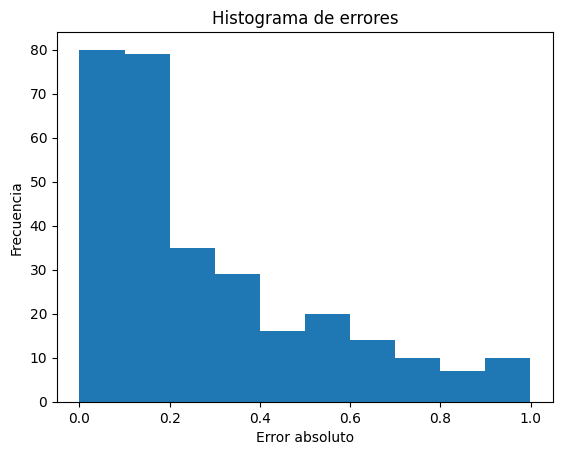

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de pertenecer a la clase positiva
y_pred = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')

In [124]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 

import pandas as pd


# Selección de características con Random Forest
X = df[['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap',
        'depth', 'latitude', 'longitude', 'terremoto', 'Year', 'Month',
        'magType']]

# Crear un clasificador de bosque aleatorio (aunque no sea una clasificación)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, df['intensidad'])  # Utiliza 'terremoto' como variable objetivo (aunque sea binaria)

# Seleccionar las características más importantes
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

# Crear un nuevo DataFrame con las características seleccionadas
df_new = pd.DataFrame(X_new, columns=X.columns[model.get_support()])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [125]:
df_new.head(15)

,magnitude,sig
0,6.5,657.0
1,6.5,775.0
2,6.6,899.0
3,7.2,860.0
4,7.3,820.0
5,6.6,802.0
6,6.9,741.0
7,7.2,804.0
8,6.6,733.0
9,7.1,777.0


In [126]:
import pandas as pd
import numpy as np

# Generar 1000 filas de datos
new_data = pd.DataFrame({
    'magnitude': np.random.uniform(0.5, 5, 1000),  # Magnitud entre 2.0 y 6.0
    'cdi': np.random.randint(0, 10, 1000),
    'mmi': np.random.randint(0, 10, 1000),
    'tsunami': np.random.randint(0, 1, 1000),  # 0 o 1
    'sig': np.random.randint(0, 1500, 1000),
    'nst': np.random.randint(0, 300, 1000),
    'dmin': np.random.uniform(0, 10, 1000),  # Rango ajustado
    'gap': np.random.uniform(0, 360, 1000),  # Máximo 360 grados
    'depth': np.random.uniform(0, 700, 1000),  # Profundidad razonable
    'latitude': np.random.uniform(-90, 90, 1000),
    'longitude': np.random.uniform(-180, 180, 1000),
    'terremoto': np.where(df['magnitude'] > 3.5, 1, 0),  # 0 o 1
    'Year': np.random.randint(2000, 2024, 1000),  # Años recientes
    'Month': np.random.randint(1, 13, 1000),  # Meses del 1 al 12
    'magType': np.random.randint(0, 10, 1000)  # Rango ficticio
})

# Agregar las filas nuevas al DataFrame existente
df = pd.concat([df, new_data], ignore_index=True)
print("Se agregaron 1000 filas nuevas.")

Se agregaron 1000 filas nuevas.


In [127]:
np.random.seed(42)
muestra_aleatoria = df.sample(n=50, replace=False)
muestra_aleatoria.round(1)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType,intensidad
1860,0.5,3,1,0,1047,296,8.8,219.9,531.2,-9.3,-172.6,1,2022,12,7,NaN
353,6.6,1,5,1,670,0,3.2,12.0,23.0,-6.5,154.5,1,2014,12,8,1.0
1333,2.6,9,8,0,527,3,5.3,160.4,311.6,-63.4,-41.0,1,2008,3,7,NaN
905,6.7,0,6,0,691,0,0.0,0.0,23.4,-15.8,-179.4,1,1998,1,7,1.0
1289,1.0,6,1,0,575,221,5.9,183.8,577.9,-18.8,-107.9,1,2020,1,4,NaN
1273,1.5,2,8,0,347,267,6.0,102.6,609.9,10.8,-85.8,1,2009,5,5,NaN
938,6.9,0,7,0,732,0,0.0,0.0,33.0,35.3,78.1,1,1996,11,7,1.0
1731,4.9,1,5,0,734,208,2.7,20.2,88.7,5.4,-59.9,1,2006,11,4,NaN
65,6.5,7,4,1,651,0,1.1,57.0,8.0,-29.5,-176.7,1,2022,1,8,1.0
1323,2.7,2,6,0,188,118,2.9,197.8,219.9,39.9,-95.7,1,2017,10,6,NaN


<Axes: xlabel='magnitude', ylabel='count'>

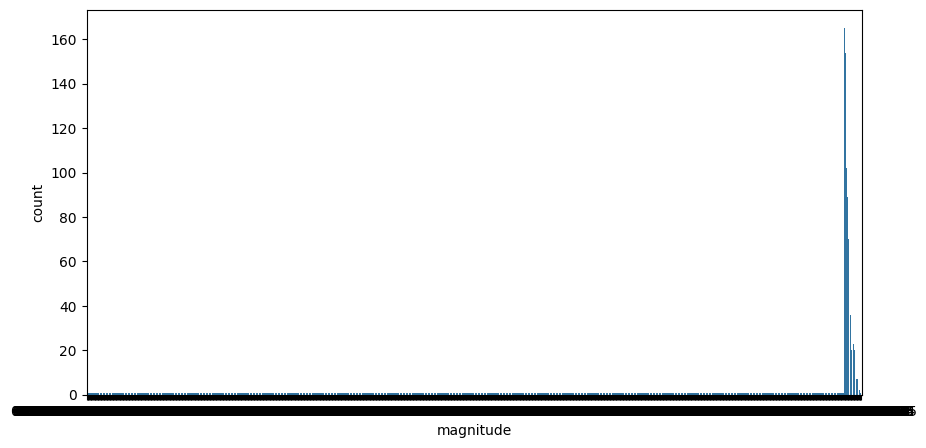

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale

Text(0.5, 1.0, 'Distribucion de terremotos')

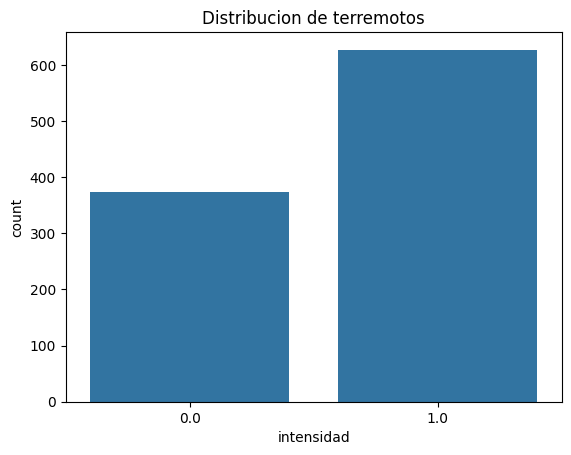

In [129]:
sns.countplot(x='intensidad',data=df)
plt.title('Distribucion de terremotos')

In [130]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month,magType,intensidad
0,6.5,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,2023,8,8,1.0
1,6.5,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,2023,7,8,1.0
2,6.6,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,2023,7,8,1.0
3,7.2,6,6,1,860,173,0.9,36.0,32.6,54.4,-160.7,1,2023,7,8,0.0
4,7.3,0,5,1,820,79,0.9,172.8,21.0,54.5,-160.8,1,2023,7,0,0.0


In [131]:
# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin', 'gap', 'depth', 'Year', 'Month', 'magType']]
y = df['intensidad']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression() 

In [132]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

ValueError: Input y contains NaN.

In [ ]:
df_new.head()

,magnitude,sig,terremoto
0,6.5,657.0,0.0
1,6.5,775.0,0.0
2,6.6,899.0,0.0
3,7.2,860.0,1.0
4,7.3,820.0,1.0


In [ ]:

# Seleccionar variables (X) y objetivo (y)
#X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
X = df_new[['magnitude', 'sig']]
y = df_new['terremoto']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Crear el modelo de regresión logística
model = LogisticRegression()

KeyError: 'terremoto'

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       195
         1.0       0.98      1.00      0.99       105

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



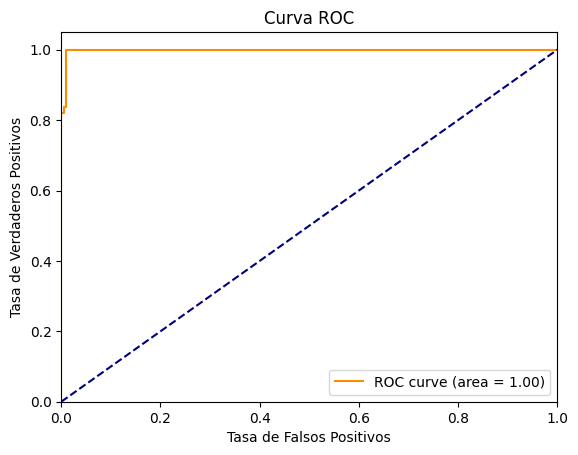

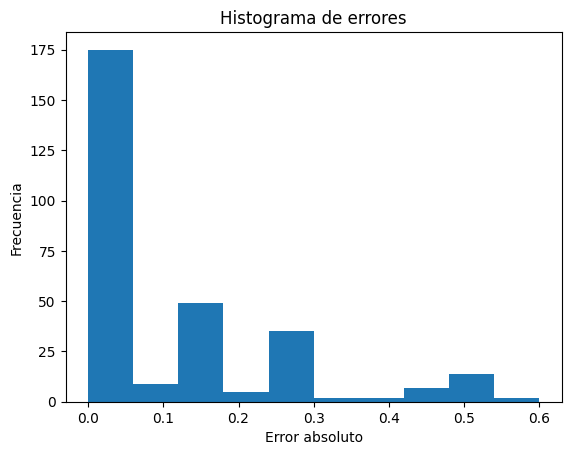

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de pertenecer a la clase positiva
y_pred = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')
plt.show()